# Pokemon Project

## Load Data

Goal is to load, then merge/split the data if necessary into dataframes that will correspond to each store in AP.

### -- type

In [1]:
import datetime as dt

import numpy as np
import pandas as pd

In [2]:
type_df = pd.read_csv(
    "resources/type_reg.csv",
    header=0,
    names=["ID", "Pokemon Type", "Opponent Pokemon Type", "Registration ID"],
)

In [3]:
type_df

,ID,Pokemon Type,Opponent Pokemon Type,Registration ID
0,1,Bug,Normal,1
1,2,Bug,Fairy,1
2,3,Normal,Bug,2
3,4,Fairy,Bug,2
4,5,Electric,Fighting,3
...,...,...,...,...
177101,177102,Poison,Poison,99998
177102,177103,Water,Water,99999
177103,177104,Water,Poison,99999
177104,177105,Water,Water,100000


### -- combat + combat views

In [4]:
combat_df = pd.read_csv(
    "resources/combats.csv",
    header=0,
    names=[
        "Registration ID",
        "Combat ID",
        "Pokemon ID",
        "Opponent Pokemon ID",
        "Result",
        "Type Multiplier",
        "Replay Views",
        "Live Views (Start - End)",
    ],
)

In [5]:
combat_views_df = combat_df.filter(
    ["Registration ID", "Replay Views", "Live Views (Start - End)"]
)

In [6]:
combat_df.drop(columns=["Replay Views", "Live Views (Start - End)"], inplace=True)

In [7]:
combat_df

,Registration ID,Combat ID,Pokemon ID,Opponent Pokemon ID,Result,Type Multiplier
0,1,1,266,298,losE,0.50
1,2,1,298,266,WIn,1.00
2,3,2,702,701,LOSE,2.00
3,4,2,701,702,WIN,0.50
4,5,3,191,668,LOSE,0.50
...,...,...,...,...,...,...
99995,99996,49998,368,303,WIN,1.00
99996,99997,49999,109,89,WIN,0.50
99997,99998,49999,89,109,LOSE,0.50
99998,99999,50000,9,73,WIN,0.50


In [8]:
combat_views_df

,Registration ID,Replay Views,Live Views (Start - End)
0,1,29629,15306;1664
1,2,109229,83732;75822
2,3,27634,4533;2656
3,4,82359,9983;40424
4,5,71664,54796;16377
...,...,...,...
99995,99996,86149,20631;36296
99996,99997,57517,10699;10967
99997,99998,41243,4648;11815
99998,99999,94341,45275;11700


### -- combat info

In [9]:
dateparse = lambda x: dt.datetime.strptime(x, "%d/%m/%Y").date()

In [10]:
combat_info_df = pd.read_csv(
    "resources/combatinfo.csv",
    header=0,
    names=["Combat ID", "Season", "Location ID", "Tickets Sold", "Date"],
    parse_dates=["Date"],
    date_parser=dateparse,
    dtype={"Season": str},
)

In [11]:
combat_info_df

,Combat ID,Season,Location ID,Tickets Sold,Date
0,1,1,1,1959,3001-02-18
1,2,1,2,1921,3001-02-18
2,3,1,3,1936,3001-02-18
3,4,1,4,1737,3001-02-18
4,5,1,5,1971,3001-02-18
...,...,...,...,...,...
49995,49996,5,7,1945,3005-06-14
49996,49997,5,2,1964,3005-06-14
49997,49998,5,7,1932,3005-06-14
49998,49999,5,16,1942,3005-06-14


### -- location

In [12]:
location_df = pd.read_csv(
    "resources/locations.csv",
    header=0,
    names=[
        "Location ID",
        "Region",
        "Settlement",
        "Stadium Cost",
        "Ticket Price",
        "Stadium Capacity",
    ],
)

In [13]:
location_df

,Location ID,Region,Settlement,Stadium Cost,Ticket Price,Stadium Capacity
0,1,Alola,Iki Town,17000,15,2000
1,2,Unova,Mistralton City,24000,20,2000
2,3,Johto,Blackthorn City,22000,20,2000
3,4,Hoenn,Lilycove City,21000,20,2000
4,5,Kanto,Viridian City,25000,20,2000
5,6,Galar,Wyndon,24000,20,2000
6,7,Galar,Ballonlea,22000,20,2000
7,8,Johto,Cherrygrove City,23000,20,2000
8,9,Johto,Mahogany Town,15000,15,2000
9,10,Alola,Malie City,19000,15,2000


### -- pokemon

In [14]:
pokemon_df = pd.read_csv(
    "resources/pokemon.csv",
    header=0,
    names=[
        "Pokedex",
        "Generation",
        "Pokemon",
        "JP Name",
        "Primary Type",
        "Secondary Type",
        "Classification",
        "Percentage Male",
        "Percentage Female",
        "Height",
        "Weight",
        "Capture Rate",
        "Base Egg Steps",
        "HP",
        "Attack",
        "Defense",
        "SP Attack",
        "SP Defense",
        "Speed",
        "Sub-Legendary",
        "Legendary",
        "Mythical",
    ],
    usecols=[
        "Pokedex",
        "Generation",
        "Pokemon",
        "Classification",
        "Percentage Male",
        "Percentage Female",
        "Height",
        "Weight",
        "Capture Rate",
        "Base Egg Steps",
        "HP",
        "Attack",
        "Defense",
        "SP Attack",
        "SP Defense",
        "Speed",
        "Sub-Legendary",
        "Legendary",
        "Mythical",
    ],
)

In [15]:
pokemon_df

,Pokedex,Generation,Pokemon,Classification,Percentage Male,Percentage Female,Height,Weight,Capture Rate,Base Egg Steps,HP,Attack,Defense,SP Attack,SP Defense,Speed,Sub-Legendary,Legendary,Mythical
0,1,I,Bulbasaur,Seed,88.14,11.86,0.7,6.9,45,5120,45,49,49,65,65,45,0,0,0
1,2,I,Ivysaur,Seed,88.14,11.86,1.0,13.0,45,5120,60,62,63,80,80,60,0,0,0
2,3,I,Venusaur,Seed,88.14,11.86,2.0,100.0,45,5120,80,82,83,100,100,80,0,0,0
3,4,I,Charmander,Lizard,88.14,11.86,0.6,8.5,45,5120,39,52,43,60,50,65,0,0,0
4,5,I,Charmeleon,Flame,88.14,11.86,1.1,19.0,45,5120,58,64,58,80,65,80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,Electron,NaN,NaN,1.2,145.0,3,30720,80,100,50,100,50,200,1,0,0
894,895,VIII,Regidrago,Dragon Orb,NaN,NaN,2.1,200.0,3,30720,200,100,50,100,50,80,1,0,0
895,896,VIII,Glastrier,Wild Horse,NaN,NaN,2.2,800.0,3,30720,100,145,130,65,110,30,1,0,0
896,897,VIII,Spectrier,Swift Horse,NaN,NaN,2.0,44.5,3,30720,100,65,60,145,80,130,0,0,0


## Prepare Data

Transform the data in each dataframe, add calculated columns etc. to be ready to load into the AP stores.

### -- combat

In [16]:
combat_df["Result"] = combat_df["Result"].str.upper()

In [17]:
combat_df

,Registration ID,Combat ID,Pokemon ID,Opponent Pokemon ID,Result,Type Multiplier
0,1,1,266,298,LOSE,0.50
1,2,1,298,266,WIN,1.00
2,3,2,702,701,LOSE,2.00
3,4,2,701,702,WIN,0.50
4,5,3,191,668,LOSE,0.50
...,...,...,...,...,...,...
99995,99996,49998,368,303,WIN,1.00
99996,99997,49999,109,89,WIN,0.50
99997,99998,49999,89,109,LOSE,0.50
99998,99999,50000,9,73,WIN,0.50


### -- combat views

In [18]:
combat_views_df["Live Views (Start - End)"] = combat_views_df.apply(
    lambda row: [int(x) for x in row["Live Views (Start - End)"].split(";")], axis=1
)

In [19]:
def calc_views_change(l):
    return (l[1] - l[0]) / l[0]

In [20]:
combat_views_df["Live Views Change"] = combat_views_df.apply(
    lambda row: calc_views_change(row["Live Views (Start - End)"]), axis=1
)

In [21]:
combat_views_df["Live Views Start"] = combat_views_df.apply(
    lambda row: row["Live Views (Start - End)"][0], axis=1
)

In [22]:
combat_views_df["Live Views End"] = combat_views_df.apply(
    lambda row: row["Live Views (Start - End)"][1], axis=1
)

In [23]:
combat_views_df

,Registration ID,Replay Views,Live Views (Start - End),Live Views Change,Live Views Start,Live Views End
0,1,29629,"[15306, 1664]",-0.891284,15306,1664
1,2,109229,"[83732, 75822]",-0.094468,83732,75822
2,3,27634,"[4533, 2656]",-0.414075,4533,2656
3,4,82359,"[9983, 40424]",3.049284,9983,40424
4,5,71664,"[54796, 16377]",-0.701128,54796,16377
...,...,...,...,...,...,...
99995,99996,86149,"[20631, 36296]",0.759294,20631,36296
99996,99997,57517,"[10699, 10967]",0.025049,10699,10967
99997,99998,41243,"[4648, 11815]",1.541954,4648,11815
99998,99999,94341,"[45275, 11700]",-0.741579,45275,11700


### -- pokemon

In [24]:
pokemon_df["(Sub)Legendary or Mythical"] = pokemon_df.apply(
    lambda row: True if (row["Sub-Legendary"] or row["Legendary"] or row["Mythical"]) else False, axis=1
)

In [25]:
pokemon_df.drop(columns=["Sub-Legendary", "Legendary", "Mythical"], inplace=True)

In [26]:
pokemon_df

,Pokedex,Generation,Pokemon,Classification,Percentage Male,Percentage Female,Height,Weight,Capture Rate,Base Egg Steps,HP,Attack,Defense,SP Attack,SP Defense,Speed,(Sub)Legendary or Mythical
0,1,I,Bulbasaur,Seed,88.14,11.86,0.7,6.9,45,5120,45,49,49,65,65,45,False
1,2,I,Ivysaur,Seed,88.14,11.86,1.0,13.0,45,5120,60,62,63,80,80,60,False
2,3,I,Venusaur,Seed,88.14,11.86,2.0,100.0,45,5120,80,82,83,100,100,80,False
3,4,I,Charmander,Lizard,88.14,11.86,0.6,8.5,45,5120,39,52,43,60,50,65,False
4,5,I,Charmeleon,Flame,88.14,11.86,1.1,19.0,45,5120,58,64,58,80,65,80,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,Electron,NaN,NaN,1.2,145.0,3,30720,80,100,50,100,50,200,True
894,895,VIII,Regidrago,Dragon Orb,NaN,NaN,2.1,200.0,3,30720,200,100,50,100,50,80,True
895,896,VIII,Glastrier,Wild Horse,NaN,NaN,2.2,800.0,3,30720,100,145,130,65,110,30,True
896,897,VIII,Spectrier,Swift Horse,NaN,NaN,2.0,44.5,3,30720,100,65,60,145,80,130,False


## Set Up Cube

Create cube and load stores.

### -- create stores

In [27]:
import atoti as tt

session = tt.create_session(config={"port": 8080, "user_content_storage": "./content"})

In [28]:
type_df["ID"] = type_df["ID"].astype(str)
type_df["Registration ID"] = type_df["Registration ID"].astype(str)

combat_df["Registration ID"] = combat_df["Registration ID"].astype(str)
combat_df["Combat ID"] = combat_df["Combat ID"].astype(str)
combat_df["Pokemon ID"] = combat_df["Pokemon ID"].astype(str)
combat_df["Opponent Pokemon ID"] = combat_df["Opponent Pokemon ID"].astype(str)

combat_info_df["Combat ID"] = combat_info_df["Combat ID"].astype(str)
combat_info_df["Location ID"] = combat_info_df["Location ID"].astype(str)

combat_views_df["Registration ID"] = combat_views_df["Registration ID"].astype(str)

location_df["Location ID"] = location_df["Location ID"].astype(str)

pokemon_df["Pokedex"] = pokemon_df["Pokedex"].astype(str)

In [29]:
type_t = session.read_pandas(
    type_df,
    table_name="Types",
    keys=["ID"]
)

In [30]:
combat_t = session.read_pandas(
    combat_df,
    table_name="Combats",
    keys=["Registration ID"]
)

In [31]:
combat_views_t = session.read_pandas(
    combat_views_df,
    table_name="Combat Views",
    keys=["Registration ID"],
    types={
        "Replay Views": tt.type.LONG,
        "Live Views (Start - End)": tt.type.NULLABLE_LONG_ARRAY,
        "Live Views Change": tt.type.DOUBLE,
        "Live Views Start": tt.type.LONG,
        "Live Views End": tt.type.LONG,
    }
)

In [32]:
combat_info_t = session.read_pandas(
    combat_info_df,
    table_name="Combat Info",
    keys=["Combat ID"]
)

In [33]:
location_t = session.read_pandas(
    location_df,
    table_name="Locations",
    keys=["Location ID"],
    types={
        "Stadium Cost": tt.type.DOUBLE,
        "Ticket Price": tt.type.DOUBLE
    },
)

In [34]:
pokemon_t = session.read_pandas(
    pokemon_df,
    table_name="Pokemon",
    keys=["Pokedex"]
)

In [35]:
pokemon_df.columns = map(lambda n: "Opponent " + n, pokemon_df.columns)

In [36]:
o_pokemon_t = session.read_pandas(
    pokemon_df,
    table_name="Opponent Pokemon",
    keys=["Opponent Pokedex"]
)

### -- set up store schema

In [37]:
cube = session.create_cube(type_t)

In [38]:
type_t.join(combat_t, mapping={"Registration ID": "Registration ID"})

In [39]:
combat_t.join(combat_views_t, mapping={"Registration ID": "Registration ID"})

In [40]:
combat_t.join(combat_info_t, mapping={"Combat ID": "Combat ID"})

In [41]:
combat_info_t.join(location_t, mapping={"Location ID": "Location ID"})

In [42]:
combat_t.join(pokemon_t, mapping={"Pokemon ID": "Pokedex"})

In [43]:
combat_t.join(o_pokemon_t, mapping={"Opponent Pokemon ID": "Opponent Pokedex"})

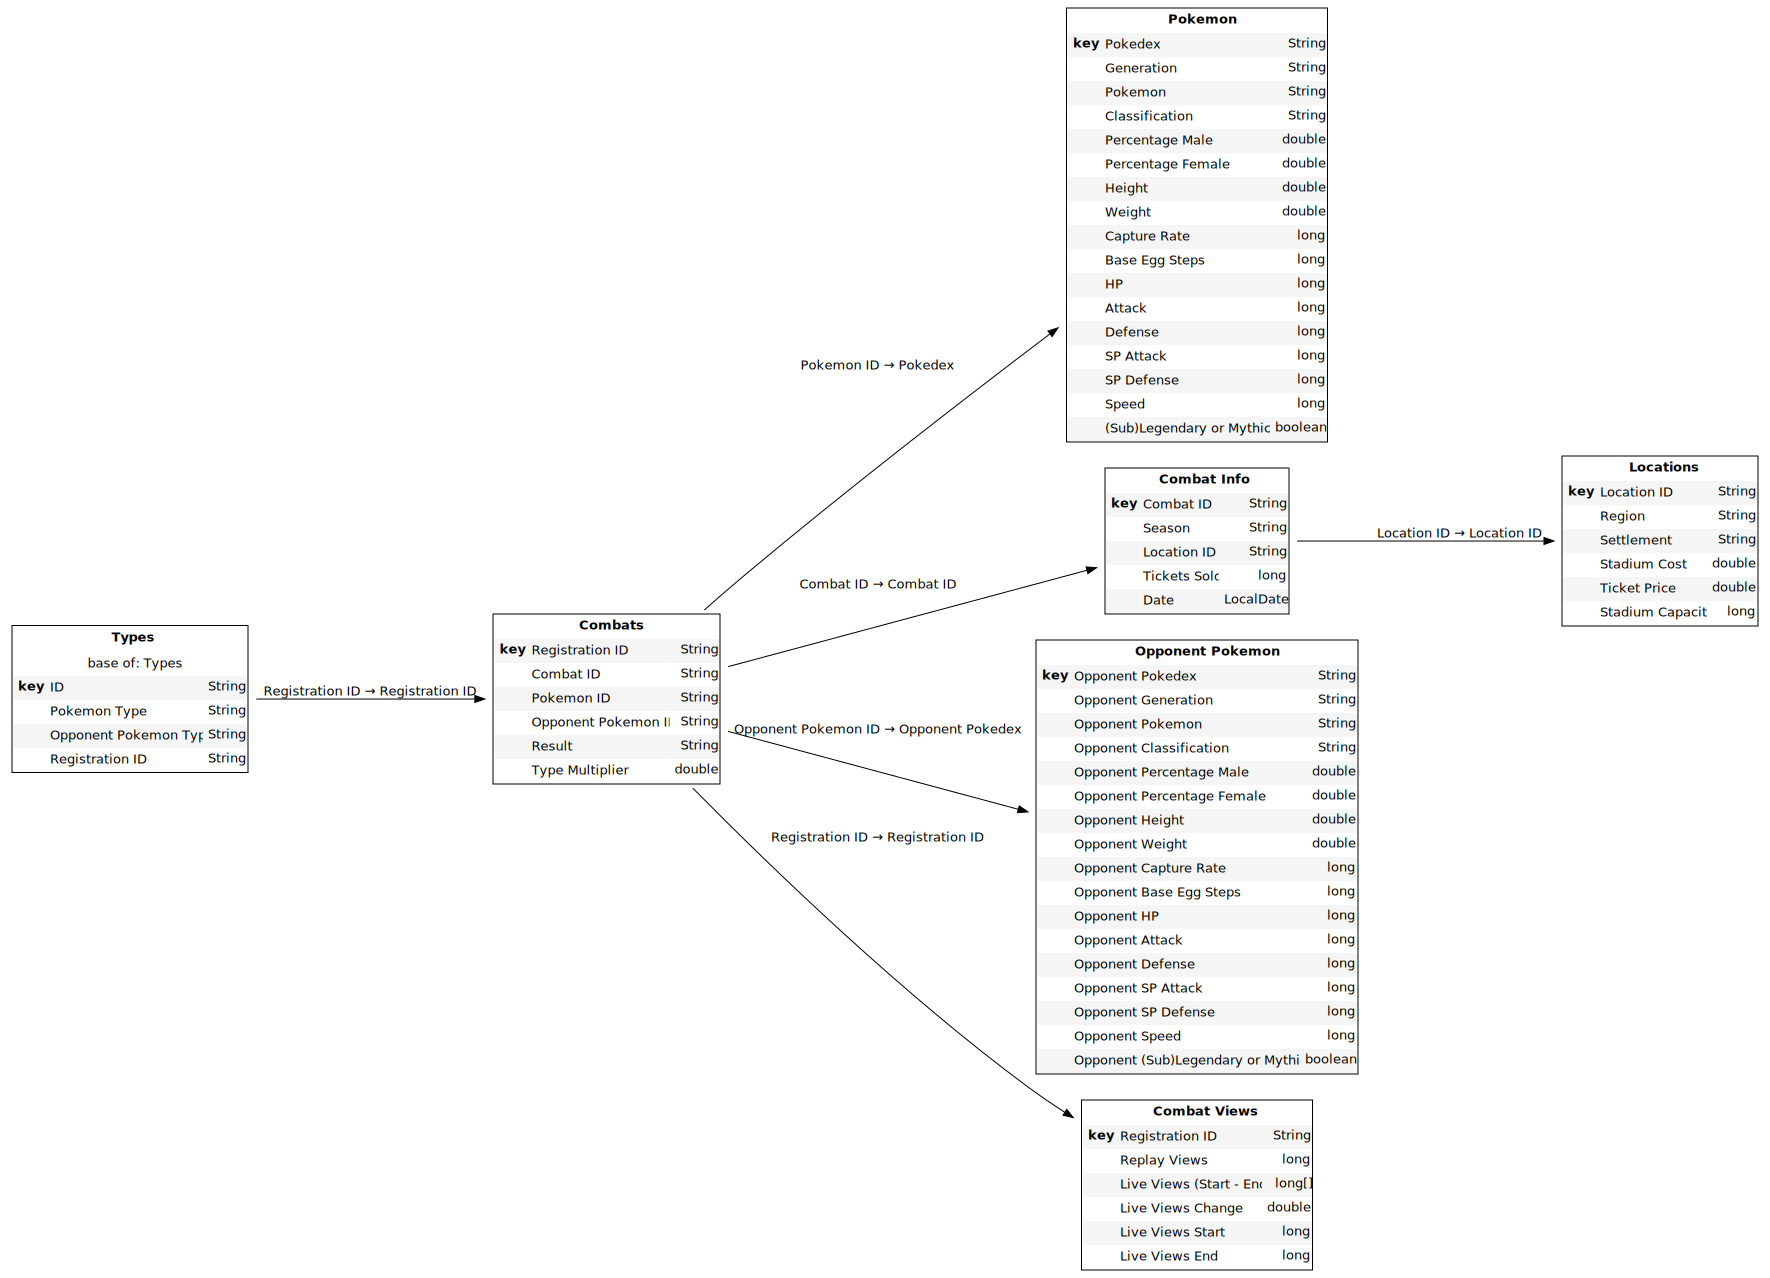

In [44]:
session.tables.schema

### -- view cube

In [45]:
h = cube.hierarchies
m = cube.measures
l = cube.levels

In [46]:
h

Hierarchies()

In [47]:
m

Measures()

### -- hierarchies

Here I am going to clean up the hierarchies automatically created that I don't need, and create others.

In [48]:
del h["ID"]
del h["Opponent Pokemon ID"]
del h["Opponent Classification"]
del h["Opponent Generation"]

In [49]:
cube.create_date_hierarchy(
    "Date",
    column=combat_info_t["Date"],
    levels={"Year": "yyyy", "Month": "MMM", "Day": "dd"},
)
h["Date"].dimension = "Time"

In [50]:
h["Pokemon Type"].dimension = "Pokemon"
h["Opponent Pokemon Type"].dimension = "Opponent Pokemon"

Ordering the Pokemon types by the standard:

In [51]:
l["Pokemon Type"].comparator = tt.comparator.first_members(
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy",
)
l["Opponent Pokemon Type"].comparator = tt.comparator.first_members(
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy",
)

In [52]:
h["Season"].dimension = "Time"

In [53]:
h["Win-Lose"] = {"Result": combat_t["Result"]}
h["Win-Lose"].dimension = "Win-Lose"
del h["Result"]
l["Result"].comparator = tt.comparator.first_members("WIN", "LOSE")

In [54]:
h["Location"] = [l["Region"], l["Settlement"]]
h["Location"].dimension = "Location"
del h["Region"]
del h["Settlement"]

These are some hierarchies needed for measures later on that do not need to be visible.

In [55]:
h["Registration ID"].visible = False
h["Registration ID"].dimension = "Hidden"
h["Combat ID"].visible = False
h["Combat ID"].dimension = "Hidden"
h["Location ID"].visible = False
h["Location ID"].dimension = "Hidden"
h["Pokemon ID"].visible = False
h["Pokemon ID"].dimension = "Hidden"

In [56]:
h

Hierarchies()

### -- measures

In [57]:
del m["contributors.COUNT"]

Data Folder

I am using this folder to store the measures that are used to display overall info about the dataset.

In [58]:
m["No. of Matches"] = tt.agg.count_distinct(combat_t["Combat ID"])

In [59]:
m["No. of Pokemon"] = tt.agg.count_distinct(pokemon_t["Pokedex"])

In [60]:
m["No. of Regions"] = tt.agg.count_distinct(location_t["Region"])

In [61]:
m["No. of Locations"] = tt.agg.count_distinct(location_t["Location ID"])

In [62]:
m["No. of Seasons"] = tt.agg.count_distinct(combat_info_t["Season"])

In [63]:
m["No. of Days"] = tt.agg.count_distinct(combat_info_t["Date"])

In [64]:
for measure in [
    m["No. of Matches"],
    m["No. of Pokemon"],
    m["No. of Regions"],
    m["No. of Locations"],
    m["No. of Seasons"],
    m["No. of Days"],
]:
    measure.folder = "Data"

After creating those measures, we can get a nice overall view of the dataset like this:

In [65]:
session.visualize("Overview of Data")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [66]:
session.visualize("No. of Matches Held Over Seasons")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Results Folder

Here I am creating the measures revolving around win/lose stats.

In [67]:
m["Win"] = tt.where(
    tt.filter(m["No. of Matches"], l["Result"] == "WIN") == None, 
    0, 
    tt.filter(m["No. of Matches"], l["Result"] == "WIN")
)

In [68]:
m["Lose"] = tt.where(
    tt.filter(m["No. of Matches"], l["Result"] == "LOSE") == None,
    0,
    tt.filter(m["No. of Matches"], l["Result"] == "LOSE")
)

In [69]:
m["Win Rate"] = m["Win"] / (m["Win"] + m["Lose"])
m["Win Rate"].formatter = "DOUBLE[0.00%]"

With the Win Rate measure we can take a look at the win rate for each pokemon type:

In [70]:
session.visualize("Win Rate For Each Pokemon Type")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Next I am going to calculate the trend win rate for a pokemon over the seasons:

In [71]:
m["Trend Win Rate"] = tt.where(
    l["Season"] != "1",
    m["Win Rate"] - tt.shift(m["Win Rate"], l["Season"], offset=-1),
)
m["Trend Win Rate"].formatter = "DOUBLE[0.00%]"

Here is Chikorita's trend win rate:

In [72]:
session.visualize("Trend Win Rate For Chikorita")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Calculating max win rate scoped by each pokemon in order to find the highest win rate among a group of pokemon:

In [73]:
m["Max Win Rate (Pokemon)"] = tt.agg.max(
    m["Win Rate"], scope=tt.scope.origin(l["Pokemon"])
)
m["Max Win Rate (Pokemon)"].formatter = "DOUBLE[0.00%]"

This is something similar for max win rate by season:

In [74]:
m["Max Win Rate (Season)"] = tt.agg.max(
    m["Win Rate"], scope=tt.scope.origin(l["Season"])
)
m["Max Win Rate (Season)"].formatter = "DOUBLE[0.00%]"

So now we can look at Psyduck's highest win rate out of all the seasons:

In [75]:
session.visualize("Max Win Rate (Season) for Psyduck")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

With the max win rate measure, we can pick out all the pokemon whose highest win rate over all the seasons have never gone above 30% :(

In [76]:
m["Boost this Pokemon"] = tt.where(
    (m["Max Win Rate (Season)"] < 0.3) & (l["Season"] == None), "BOOST", ""
)

Hopefully these Pokemon will get boosted soon.

In [77]:
session.visualize("Boost Pokemon")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [78]:
for measure in [
    m["Win"],
    m["Lose"],
    m["Win Rate"],
    m["Trend Win Rate"],
    m["Max Win Rate (Pokemon)"],
    m["Max Win Rate (Season)"],
    m["Boost this Pokemon"],
]:
    measure.folder = "Results"

Stats Folder

Here I will store pokemon stat aggregates. These are scoped by Registration ID since our base dataset includes duplicated data.

In [79]:
m["Avg HP"] = tt.agg.mean(
    tt.value(pokemon_t["HP"]), scope=tt.scope.origin(l["Registration ID"])
)

In [80]:
m["Avg Def"] = tt.agg.mean(
    tt.value(pokemon_t["Defense"]), scope=tt.scope.origin(l["Registration ID"])
)

In [81]:
m["Avg SP Def"] = tt.agg.mean(
    tt.value(pokemon_t["SP Defense"]), scope=tt.scope.origin(l["Registration ID"])
)

In [82]:
m["Avg Atk"] = tt.agg.mean(
    tt.value(pokemon_t["Attack"]), scope=tt.scope.origin(l["Registration ID"])
)

In [83]:
m["Avg SP Atk"] = tt.agg.mean(
    tt.value(pokemon_t["SP Attack"]), scope=tt.scope.origin(l["Registration ID"])
)

In [84]:
m["Avg Speed"] = tt.agg.mean(
    tt.value(pokemon_t["Speed"]), scope=tt.scope.origin(l["Registration ID"])
)

In [85]:
m["Avg Type Multiplier"] = tt.agg.mean(
    tt.value(combat_t["Type Multiplier"]), scope=tt.scope.origin(l["Registration ID"])
)

In [86]:
for measure in [
    m["Avg HP"],
    m["Avg Def"],
    m["Avg SP Def"],
    m["Avg Atk"],
    m["Avg SP Atk"],
    m["Avg Speed"],
    m["Avg Type Multiplier"]
]:
    measure.folder = "Pokemon Stats"

Now we can compare the average speed of the pokemon in winning vs losing battles.

In [87]:
session.visualize("Average Speed")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Replay Views Folder

In [88]:
m["Total Replay Views"] = tt.agg.sum(
    tt.value(combat_views_t["Replay Views"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [89]:
m["Avg Replay Views"] = tt.agg.mean(
    tt.value(combat_views_t["Replay Views"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [90]:
m["Max Replay Views"] = tt.agg.max(tt.value(combat_views_t["Replay Views"]))

In [91]:
m["Min Replay Views"] = tt.agg.min(tt.value(combat_views_t["Replay Views"]))

In [92]:
for measure in [
    m["Total Replay Views"],
    m["Avg Replay Views"],
    m["Max Replay Views"],
    m["Min Replay Views"],
]:
    measure.folder = "Replay Views"

In [93]:
session.visualize("Replay Views")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [94]:
session.visualize("Most Popular Pokemon (Replay Views)")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Live Views Folder

In [95]:
m["Avg % Change"] = tt.agg.mean(
    tt.value(combat_views_t["Live Views Change"]),
    scope=tt.scope.origin(l["Registration ID"]),
)
m["Avg % Change"].formatter = "DOUBLE[0.00%]"

In [96]:
m["Max % Change"] = tt.agg.max(
    tt.value(combat_views_t["Live Views Change"]),
    scope=tt.scope.origin(l["Registration ID"]),
)
m["Max % Change"].formatter = "DOUBLE[0.00%]"

In [97]:
m["Min % Change"] = tt.agg.min(
    tt.value(combat_views_t["Live Views Change"]),
    scope=tt.scope.origin(l["Registration ID"]),
)
m["Min % Change"].formatter = "DOUBLE[0.00%]"

In [98]:
m["Avg Start Views"] = tt.agg.mean(
    tt.value(combat_views_t["Live Views Start"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [99]:
m["Max Start Views"] = tt.agg.max(
    tt.value(combat_views_t["Live Views Start"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [100]:
m["Min Start Views"] = tt.agg.min(
    tt.value(combat_views_t["Live Views Start"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [101]:
m["Avg End Views"] = tt.agg.mean(
    tt.value(combat_views_t["Live Views End"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [102]:
m["Max End Views"] = tt.agg.max(
    tt.value(combat_views_t["Live Views End"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [103]:
m["Min End Views"] = tt.agg.min(
    tt.value(combat_views_t["Live Views End"]),
    scope=tt.scope.origin(l["Registration ID"]),
)

In [104]:
for measure in [
    m["Avg % Change"],
    m["Max % Change"],
    m["Min % Change"],
    m["Avg Start Views"],
    m["Max Start Views"],
    m["Min Start Views"],
    m["Avg End Views"],
    m["Max End Views"],
    m["Min End Views"],
]:
    measure.folder = "Live Views"

In [105]:
session.visualize("Live Views by W/L")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Sales Folder

In [106]:
m["Stadium Capacity"] = tt.agg.max(
    tt.value(location_t["Stadium Capacity"]), scope=tt.scope.origin(l["Settlement"])
)

In [107]:
m["Avg Stadium Capacity"] = tt.agg.mean(
    tt.value(combat_info_t["Tickets Sold"]) / tt.value(location_t["Stadium Capacity"]),
    scope=tt.scope.origin(l["Combat ID"]),
)
m["Avg Stadium Capacity"].formatter = "DOUBLE[0.00%]"

In [108]:
m["Max Stadium Capacity"] = tt.agg.max(
    tt.value(combat_info_t["Tickets Sold"]) / tt.value(location_t["Stadium Capacity"]),
    scope=tt.scope.origin(l["Combat ID"]),
)
m["Max Stadium Capacity"].formatter = "DOUBLE[0.00%]"

In [109]:
m["Min Stadium Capacity"] = tt.agg.min(
    tt.value(combat_info_t["Tickets Sold"]) / tt.value(location_t["Stadium Capacity"]),
    scope=tt.scope.origin(l["Combat ID"]),
)
m["Min Stadium Capacity"].formatter = "DOUBLE[0.00%]"

In [110]:
session.visualize("Average Stadium Capacity by Location")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [111]:
m["Avg Stadium Cost"] = tt.agg.mean(
    tt.value(location_t["Stadium Cost"]), scope=tt.scope.origin(l["Combat ID"])
)

In [112]:
m["Max Stadium Cost"] = tt.agg.max(
    tt.value(location_t["Stadium Cost"]), scope=tt.scope.origin(l["Settlement"])
)

In [113]:
m["Min Stadium Cost"] = tt.agg.min(
    tt.value(location_t["Stadium Cost"]), scope=tt.scope.origin(l["Settlement"])
)

In [114]:
m["Avg Ticket Price"] = tt.agg.mean(
    tt.value(location_t["Ticket Price"]), scope=tt.scope.origin(l["Combat ID"])
)

In [115]:
m["Max Ticket Price"] = tt.agg.max(
    tt.value(location_t["Ticket Price"]), scope=tt.scope.origin(l["Settlement"])
)

In [116]:
m["Min Ticket Price"] = tt.agg.min(
    tt.value(location_t["Ticket Price"]), scope=tt.scope.origin(l["Settlement"])
)

In [117]:
m["No. of Matches at Full Stadium Capacity"] = tt.agg.sum(
    tt.where(
        tt.value(combat_info_t["Tickets Sold"])
        == tt.value(location_t["Stadium Capacity"]),
        1,
        0,
    ),
    scope=tt.scope.origin(l["Combat ID"]),
)

In [118]:
m["Percentage of Matches at Full Stadium Capacity"] = (
    m["No. of Matches at Full Stadium Capacity"] / m["No. of Matches"]
)
m["Percentage of Matches at Full Stadium Capacity"].formatter = "DOUBLE[0.00%]"

In [119]:
session.visualize("% of Matches at Full Stadium Capacity")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [120]:
m["Profit"] = tt.agg.sum(
    (tt.value(combat_info_t["Tickets Sold"]) * tt.value(location_t["Ticket Price"]))
    - tt.value(location_t["Stadium Cost"]),
    scope=tt.scope.origin(l["Combat ID"]),
)

In [121]:
m["Profit Location Ratio"] = m["Profit"] / tt.parent_value(
    m["Profit"], degrees={h["Location"]: 1}
)
m["Profit Location Ratio"].formatter = "DOUBLE[0.00%]"

In [122]:
session.visualize("Profit Location Ratio")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [123]:
m["Tickets Sold"] = tt.agg.sum(
    tt.value(combat_info_t["Tickets Sold"]), scope=tt.scope.origin(l["Combat ID"])
)
m["Tickets Sold"].formatter = "INT[000,000]"

In [124]:
for measure in [
    m["Stadium Capacity"],
    m["Avg Stadium Capacity"],
    m["Max Stadium Capacity"],
    m["Min Stadium Capacity"],
    m["Avg Stadium Cost"],
    m["Max Stadium Cost"],
    m["Min Stadium Cost"],
    m["Avg Ticket Price"],
    m["Max Ticket Price"],
    m["Min Ticket Price"],
    m["No. of Matches at Full Stadium Capacity"],
    m["Percentage of Matches at Full Stadium Capacity"],
    m["Profit"],
    m["Profit Location Ratio"],
    m["Tickets Sold"],
]:
    measure.folder = "Sales"

Match Count Folder

In [125]:
m["Match Location Ratio"] = m["No. of Matches"] / tt.parent_value(
    m["No. of Matches"], degrees={h["Location"]: 1}
)
m["Match Location Ratio"].formatter = "DOUBLE[0.00%]"

In [126]:
session.visualize("Match Location Ratio")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [127]:
m["Match Season Ratio"] = m["No. of Matches"] / tt.parent_value(
    m["No. of Matches"], degrees={h["Season"]: 1}
)
m["Match Season Ratio"].formatter = "DOUBLE[0.00%]"

In [128]:
for measure in [m["Match Location Ratio"], m["Match Season Ratio"]]:
    measure.folder = "Match Count"

### -- what-if

Simulate Ticket Sales

In [129]:
combat_info_s1 = combat_info_df.copy()

In [130]:
combat_info_s1["Tickets Sold"] = np.where(
    combat_info_s1["Location ID"] == "5",
    round(combat_info_s1["Tickets Sold"] * 0.8),
    combat_info_s1["Tickets Sold"],
)

In [131]:
combat_info_t.scenarios["Viridian What-if"].load_pandas(combat_info_s1)

Simulate Stadium Cost & Ticket Price

In [132]:
location_s1 = location_df.copy()

In [133]:
location_s1["Stadium Cost"] = np.where(
    location_s1["Location ID"] == "5", 28000, location_s1["Stadium Cost"]
)

In [134]:
location_s1["Ticket Price"] = np.where(
    location_s1["Location ID"] == "5", 25, location_s1["Ticket Price"]
)

In [135]:
location_t.scenarios["Viridian What-if"].load_pandas(location_s1)

In [136]:
session.visualize("Viridian What-if")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

# Endpoints

In [137]:
import urllib
import dateutil.parser as dp
import json
from datetime import date

In [138]:
@session.endpoint("levels/{level_name}/members", method="GET")
def get_level_members(request, user, session):
    level_name = urllib.parse.unquote(request.path_parameters["level_name"])
    dimension_name = session.cubes["Types"].levels[level_name].dimension
    hierarchy_name = session.cubes["Types"].levels[level_name].hierarchy
    mdx = (f"SELECT NON EMPTY [{dimension_name}].[{hierarchy_name}].[{level_name}].Members ON 0 FROM [Types]")
    df = session.query_mdx(mdx, keep_totals=False, timeout=30)
    members = df.index.to_list()
    if isinstance(members[0], date):
        members = list(map(lambda x: x.isoformat(), members))
    return members